IMPORTING DATASET FROM GOOGLE DRIVE USING BELOW LINK

In [ ]:
from google.colab import drive
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/sic_folder/SIC_PROJECT/archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

ML MODEL

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn import tree
from skimage.feature import local_binary_pattern
from sklearn.metrics import accuracy_score

In [ ]:
Categories=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust','Blueberry___healthy','Cherry_(including_sour)___Powdery_mildew','Cherry_(including_sour)___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___Leaf_scorch','Strawberry___healthy','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot']
flat_data_arr = [] #input array
target_arr = [] #output array
datadir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
# Path which contains all the categories of images
for i in Categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (40, 40, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(np.array([Categories.index(i)]))  # Modify to store 2D arrays
    print(f'loaded category:{i} successfully')
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data)  # dataframe
df['Target'] = target.reshape(-1, 1)  # Reshape target to 2D array
x = df.iloc[:, :-1]  # input data
y = df.iloc[:, -1]  # output data

loading... category : Apple___Apple_scab
loaded category:Apple___Apple_scab successfully
loading... category : Apple___Black_rot
loaded category:Apple___Black_rot successfully
loading... category : Apple___Cedar_apple_rust
loaded category:Apple___Cedar_apple_rust successfully
loading... category : Blueberry___healthy
loaded category:Blueberry___healthy successfully
loading... category : Cherry_(including_sour)___Powdery_mildew
loaded category:Cherry_(including_sour)___Powdery_mildew successfully
loading... category : Cherry_(including_sour)___healthy
loaded category:Cherry_(including_sour)___healthy successfully
loading... category : Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
loaded category:Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot successfully
loading... category : Corn_(maize)___Common_rust_
loaded category:Corn_(maize)___Common_rust_ successfully
loading... category : Corn_(maize)___Northern_Leaf_Blight
loaded category:Corn_(maize)___Northern_Leaf_Blight successful

DATASET VISUALIZATION

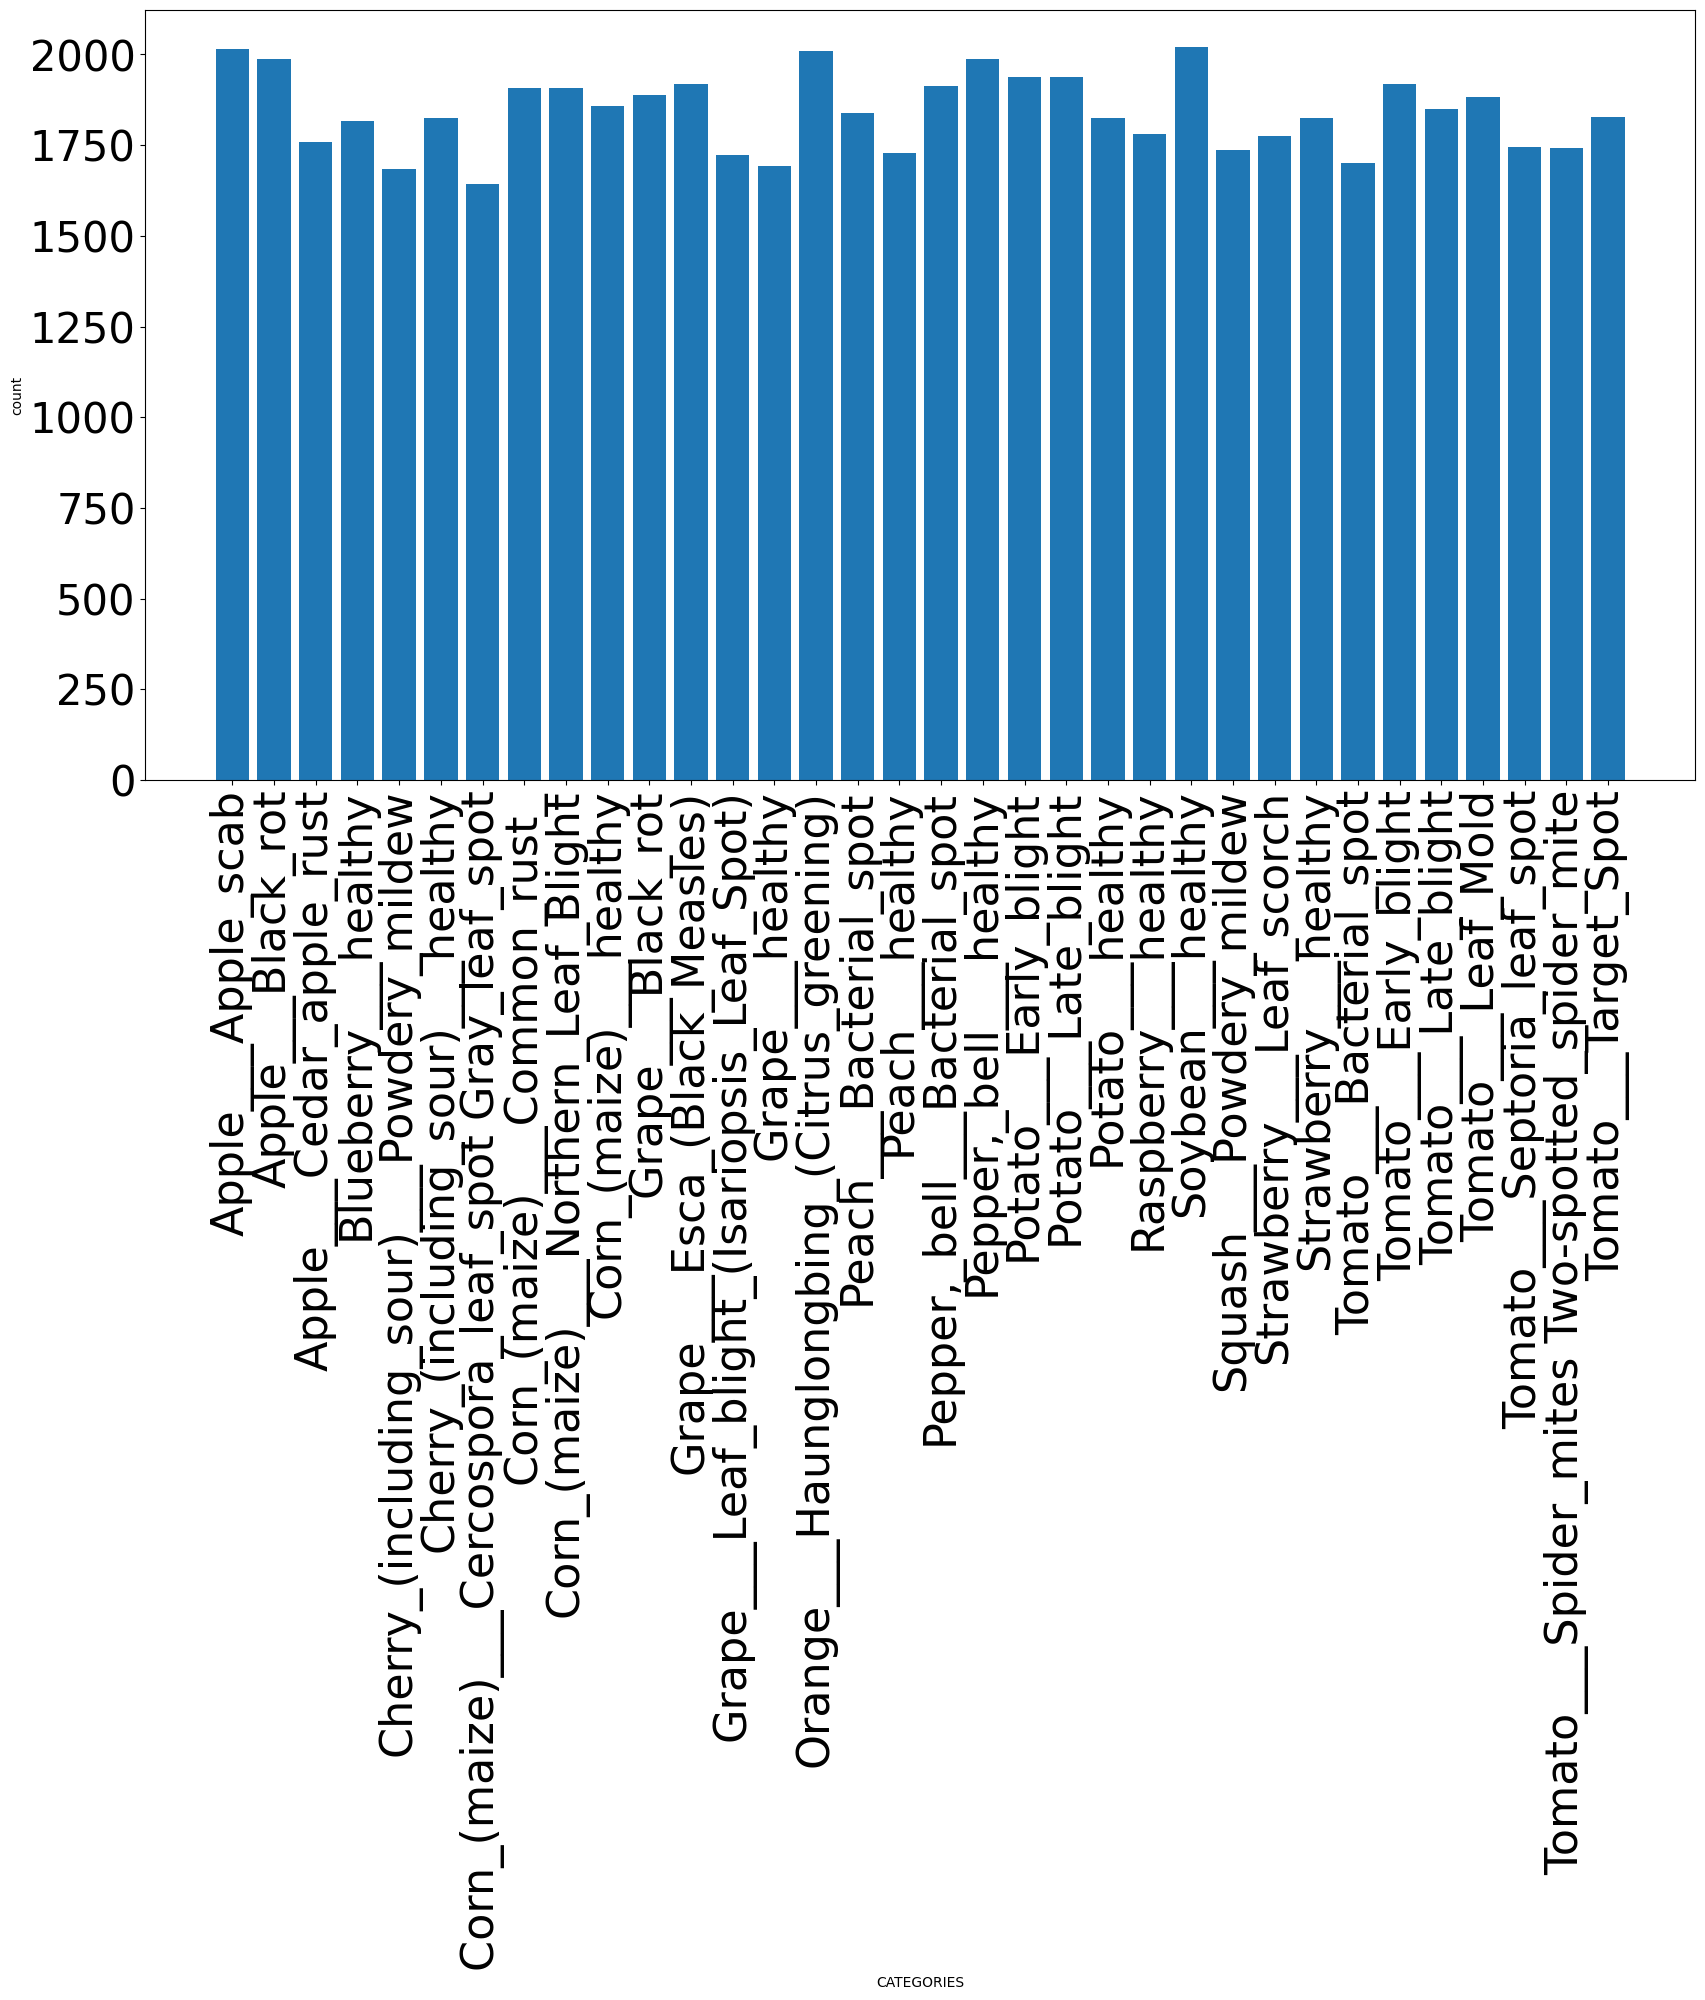

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.figure(figsize=(20,10))
plt.bar(Categories,count)
plt.xticks(rotation=90,fontsize=32)
plt.yticks(fontsize=30)
plt.xlabel('CATEGORIES')
plt.ylabel('count')
plt.show()

LBP FEATURES


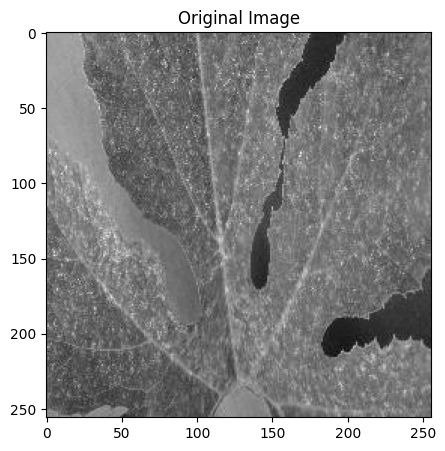

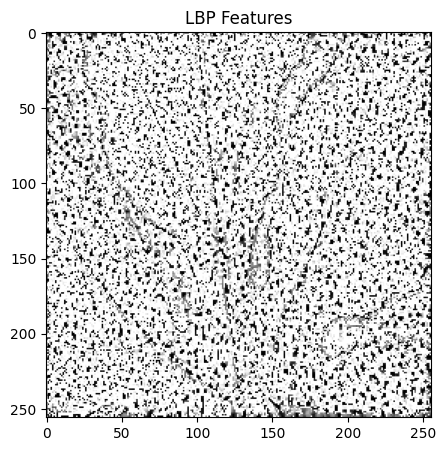

In [ ]:
# Parameters for LBP feature extraction
datadir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
radius = 3
n_points = 8 * radius
# Lists to store the extracted features and corresponding labels
lbp_features = []
labels = []
original_images = []
# Iterate over the subfolders in the main folder
for root, dirs, files in os.walk(datadir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            # Read the image
            image_path = os.path.join(root, file)
            image = imread(image_path, as_gray=True)
            # Perform LBP feature extraction
            lbp = local_binary_pattern(image, n_points, radius, method='uniform')
            # Flatten the LBP image into a 1D array
            features = np.ravel(lbp)
            # Append the features, label, and original image to the lists
            lbp_features.append(features)
            labels.append(root.split('/')[-1])  # Assumes folder names are the class labels
            original_images.append(image)
# Convert the lists to NumPy arrays
lbp_features = np.array(lbp_features)
labels = np.array(labels)
# Visualize the first original image
plt.figure(figsize=(5,5))
plt.imshow(original_images[2], cmap='gray')
plt.title('Original Image')
plt.show()
# Visualize the LBP features of the first image
plt.figure(figsize=(5,5))
plt.imshow(lbp_features[2].reshape(image.shape), cmap='gray')
plt.title('LBP Features')
plt.show()


SPLITING DATA INTO TRAINING AND TESTING

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(lbp_features, labels, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(flat_data, target,test_size=0.2, random_state=123)

MODEL IMPLEMENTATION

In [ ]:
import warnings
warnings.filterwarnings("ignore")
log_clf = LogisticRegression()
knn_clf = KNN()
tree_clf = DecisionTreeClassifier(random_state=42)
lg_clf = RandomForestClassifier(random_state=42)
for clf in (log_clf, knn_clf, tree_clf,lg_clf ):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)*100)

LogisticRegression 60.33381249001757
KNeighborsClassifier 59.04807538731832
DecisionTreeClassifier 37.677687270404085
RandomForestClassifier 72.04919341958154


In [ ]:
import pickle as pkl
with open("ml.pkl" ,"wb") as f:
  f.write(pkl.dumps(model))

CLASSIFICATION MATRIX

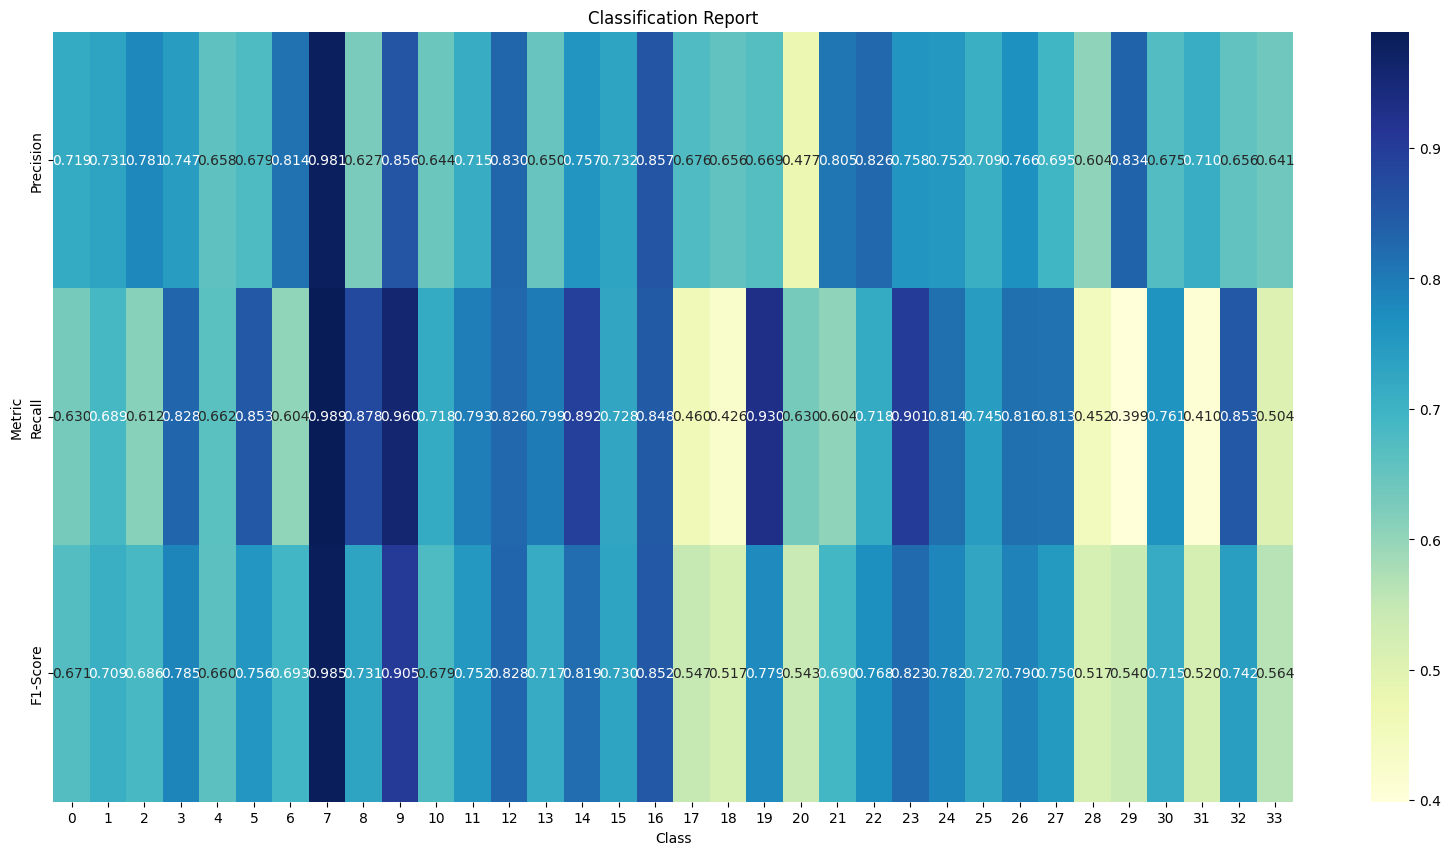

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
class_names = list(report.keys())[:-3]

# Extract precision, recall, and F1-score for each class
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Create a matrix of metrics
metrics_matrix = np.array([precision, recall, f1_score])

# Plot the heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(metrics_matrix, annot=True, cmap='YlGnBu', fmt=".3f", xticklabels=class_names, yticklabels=['Precision', 'Recall', 'F1-Score'])
ax.set_xlabel('Class')
ax.set_ylabel('Metric')
ax.set_title('Classification Report')
plt.show()

DL MODEL

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
train_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.
Found 17572 files belonging to 38 classes.
Using 3514 files for validation.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_bli

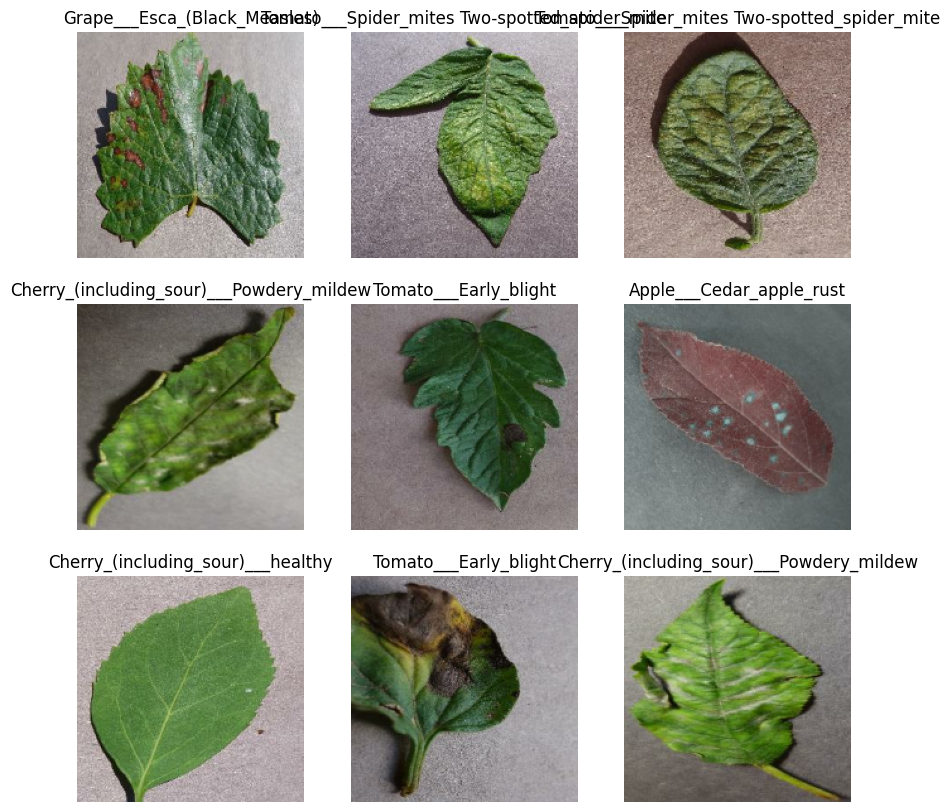

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 38
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1758/1758 [==============================] - 119s 58ms/step - loss: 1.2473 - accuracy: 0.6370 - val_loss: 0.5794 - val_accuracy: 0.8176
Epoch 2/25
1758/1758 [==============================] - 74s 42ms/step - loss: 0.4189 - accuracy: 0.8683 - val_loss: 0.3897 - val_accuracy: 0.8742
Epoch 3/25
1758/1758 [==============================] - 77s 44ms/step - loss: 0.2482 - accuracy: 0.9192 - val_loss: 0.2913 - val_accuracy: 0.9132
Epoch 4/25
1758/1758 [==============================] - 75s 42ms/step - loss: 0.1633 - accuracy: 0.9461 - val_loss: 0.4313 - val_accuracy: 0.8768
Epoch 5/25
1758/1758 [==============================] - 74s 42ms/step - loss: 0.1280 - accuracy: 0.9571 - val_loss: 0.3050 - val_accuracy: 0.9132
Epoch 6/25
1758/1758 [==============================] - 74s 42ms/step - loss: 0.1011 - accuracy: 0.9658 - val_loss: 0.3711 - val_accuracy: 0.9044
Epoch 7/25
1758/1758 [==============================] - 76s 43ms/step - loss: 0.0836 - accuracy: 0.9717 - val_loss: 0.3930 - val_accur

In [ ]:
model.save('dl.h5')

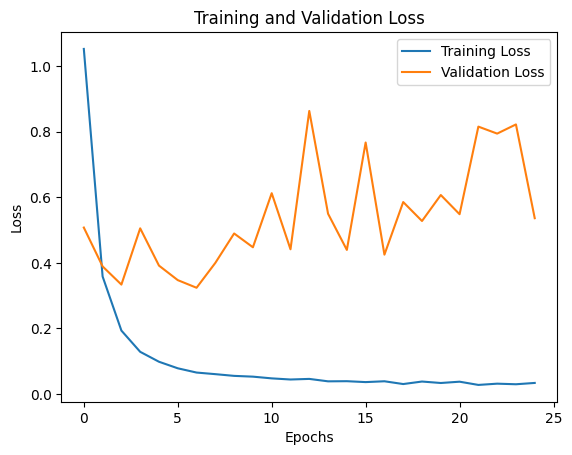

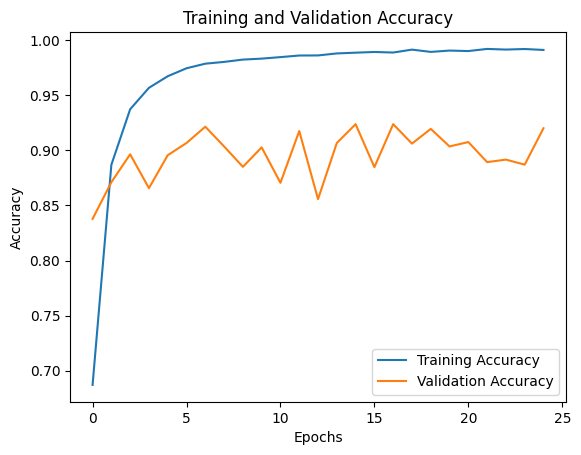

In [ ]:
# Assuming you have a variable named 'history' that contains the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the loss curve
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy curve
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
print(len(class_names))

38


CNN MODEL DEPLOYMENT

In [ ]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
model1 = Sequential()
model = tf.keras.models.load_model('dl (2).h5')
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(90),
  #tf.keras.layers.RandomGaussianNoise(stddev=0.1),
  #tf.keras.layers.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
  #tf.keras.layers.RandomTranslation(height_factor=(-0.5, 0.5), width_factor=(-0.5, 0.5)),
  #tf.keras.layers.RandomContrast(factor=0.5)
  ])

def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  augmented_image = data_augmentation(img_4d)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(38)}


In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=38)
gr.Interface(fn=predict_image, inputs=image, outputs=label,title="IMAGE-BASED PLANT DISEASE CLASSIFICATION USING DL MODEL",interpretation='default').launch(share='True',debug=True)